Decision Tree Classifier on Seed Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
# Import the data file
df = pd.read_csv('Seed_Data.csv')
df.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,KernelGroove,Target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
# Separate the features and the target
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

In [4]:
# Initiate a decision tree model (criterion: entrophy)
dt = DecisionTreeClassifier(criterion='entropy')

In [5]:
# Split the train and test data (train:67%, test:33%)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.33, random_state=0)

In [6]:
# Train the decision tree
dt = dt.fit(X_train, Y_train)

In [7]:
# Predict on test dataset
Y_predict = dt.predict(X_test)

In [8]:
# Confusion matrix
cm = confusion_matrix(Y_test,Y_predict)

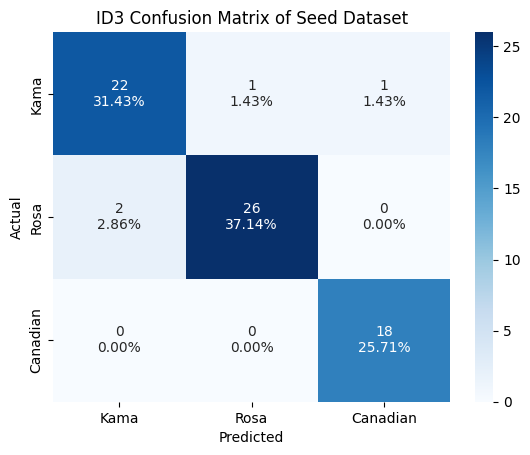

In [10]:
# Visualize confusion matrix

# Create custom level with count and percentage
count = ["{0:.0f}".format(value) for value in cm.flatten()]
percent = ["{0:0.2f}%".format(value*100) for value in cm.flatten()/np.sum(cm)]
labels = [f"{x1}\n{x2}" for x1, x2 in zip(count,percent)]
labels = np.asarray(labels).reshape(3,3)

# Define tick label
tick_label = ['Kama','Rosa','Canadian']
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=tick_label, yticklabels=tick_label)

plt.title('ID3 Confusion Matrix of Seed Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Generate classification report
report = classification_report(Y_test,Y_predict, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9167    0.9167    0.9167        24
           1     0.9630    0.9286    0.9455        28
           2     0.9474    1.0000    0.9730        18

    accuracy                         0.9429        70
   macro avg     0.9423    0.9484    0.9450        70
weighted avg     0.9431    0.9429    0.9427        70



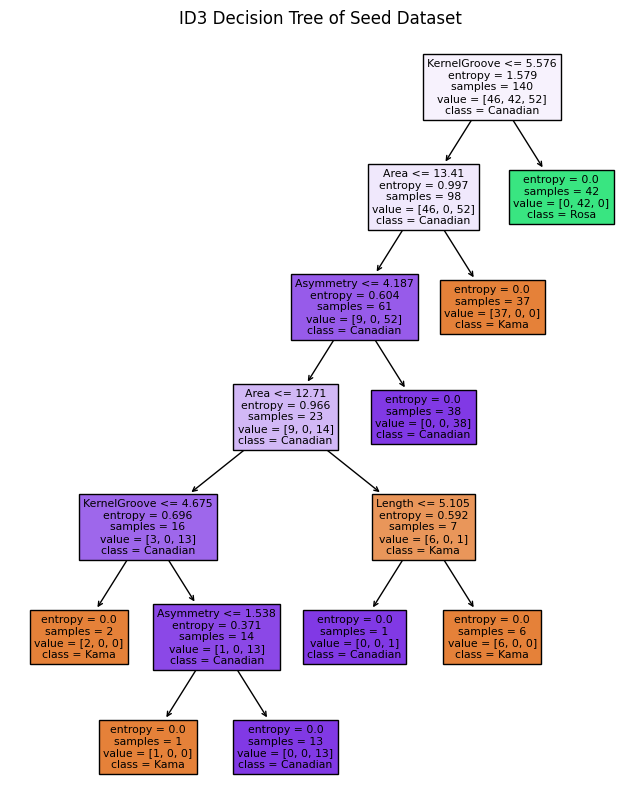

In [13]:
# Plot the decision tree
feature_names = df.columns[:-1]
class_names = ['Kama','Rosa','Canadian']
plt.figure(figsize=(8,10))
tree.plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True)
plt.title('ID3 Decision Tree of Seed Dataset')
plt.show()